2021 Takahiro Shinozaki @ Tokyo Tech

Quick introduction of pytorch tensor and gradient calculation

References: 
*   https://pytorch.org/tutorials/



In [1]:
import torch
import torch.nn as nn
from matplotlib import pyplot

In [2]:
if torch.cuda.is_available():
    print('CUDA（GPU）is available')
else:
  print('CUDA（GPU）is not available')

CUDA（GPU）is not available


In [3]:
# scalar 
x = torch.tensor(7)
print('x =', x)

y = x**2+1
print('y =', y)

x = torch.tensor(1.0)
y = torch.exp(x)
print('y =', y)

y = torch.cos(x)
print('y =', y)

x = tensor(7)
y = tensor(50)
y = tensor(2.7183)
y = tensor(0.5403)


In [4]:
# data type
x = torch.tensor(1)
print(x.dtype)

x = torch.tensor(1.0)
print(x.dtype)

x = torch.tensor(1.0, dtype=torch.float64)
print(x.dtype)

torch.int64
torch.float32
torch.float64


x = tensor([1., 2., 3., 4., 5.])
x**0.5 = tensor([1.0000, 1.4142, 1.7321, 2.0000, 2.2361])
x = tensor([ 0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000,  2.2500,  2.5000,  2.7500,  3.0000,  3.2500,  3.5000,  3.7500,
         4.0000,  4.2500,  4.5000,  4.7500,  5.0000,  5.2500,  5.5000,  5.7500,
         6.0000,  6.2500,  6.5000,  6.7500,  7.0000,  7.2500,  7.5000,  7.7500,
         8.0000,  8.2500,  8.5000,  8.7500,  9.0000,  9.2500,  9.5000,  9.7500,
        10.0000])
x[2] tensor(0.5000)


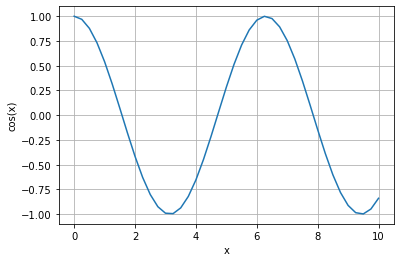

In [12]:
# vector
x = torch.tensor([1,2,3,4,5], dtype=torch.float32)
print('x =',x)
print('x**0.5 =', x**0.5)
x = torch.linspace(0,10,41)
print('x =', x)
print('x[2]', x[2])
y = torch.cos(x)
pyplot.plot(x, y)
pyplot.xlabel('x')
pyplot.ylabel('cos(x)')
pyplot.grid()
pyplot.show()

In [6]:
# matrix
x = torch.tensor([[1,2],[3,4]])
print(x)
print(x.dtype)

y = x * 2
print(y)

y= x * x
print(y)

y = torch.mm(x, x)
print('y =', y)

x = torch.tensor([[1.0,2.0],[3.0,4.0]])
b=torch.tensor([[10],[10]],dtype=torch.float32)
print(x)
print(x.dtype)
print(b)
print(b.dtype)

y = torch.mm(x, b)
print(y)

y = torch.transpose(x, 0, 1)
print(y)

tensor([[1, 2],
        [3, 4]])
torch.int64
tensor([[2, 4],
        [6, 8]])
tensor([[ 1,  4],
        [ 9, 16]])
y = tensor([[ 7, 10],
        [15, 22]])
tensor([[1., 2.],
        [3., 4.]])
torch.float32
tensor([[10.],
        [10.]])
torch.float32
tensor([[30.],
        [70.]])
tensor([[1., 3.],
        [2., 4.]])


tensor(4.5000)
x = tensor(4.)
f2(x) = tensor(13.)
x = tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])
f2(x) = tensor([97., 78., 61., 46., 33., 22., 13.,  6.,  1., -2., -3., -2.,  1.,  6.,
        13., 22., 33., 46., 61., 78., 97.])


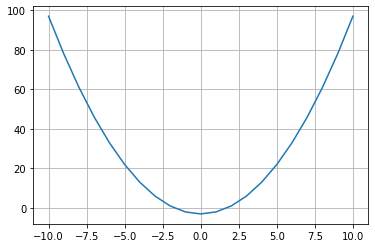

In [7]:
# function
def f1(x1, x2):
  return 2*x1+x2

a = torch.tensor(1.0)
b = torch.tensor(2.5)
print(f1(a,b))

def f2(x):
  return x**2-3

x = torch.tensor(4.0)
print('x =', x)
print('f2(x) =', f2(x))

x = torch.linspace(-10,10,21)
print('x =', x)
print('f2(x) =', f2(x))
pyplot.plot(x, f2(x))
pyplot.grid()
pyplot.show()



In [8]:
# library to visualize the strucure of computation
! pip install torchviz
from torchviz import make_dot  

# Derivative with scholar function

$\frac{\partial}{\partial x}(2x^2+3)|_{x=2} = 4x |_{x=2} = 8$


x = tensor(2., requires_grad=True)
x.grad = tensor(8.)
x.grad = None
z=  tensor(11., grad_fn=<AddBackward0>)
x.grad = tensor(8.)


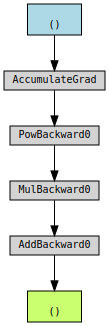

In [39]:
# derivative
x = torch.tensor(2.0, requires_grad=True) # requires_grad=True indicates to store gradient

print('x =', x)

z = 2*(x ** 2) + 3

# back-propagation (Obtain gradients using the chain rule)
z.backward()
print('x.grad =', x.grad)

def f1(x):
  return x**2

def f2(x):
  return 2*x+3

x.grad = None # reset the previously obtained gradient
print('x.grad =', x.grad)

z=f2(f1(x))
print('z= ', z)

# back-propagation (Obtain gradients using the chain rule)
z.backward()
print('x.grad =', x.grad)

# draw a graph of computation of y
make_dot(z)

# cf.
# retain_grad : To retain gradients of intermediate variables


# Derivative with vector function
$x = \left<x_1, x_2\right>$

$y = \left<y_1, y_2\right> = f(x) = \left<x_1^2+x_2, x_1+x_2^2\right>$

$z = g(y) = 2y_1 + y_2 $

$\left(\frac{\partial z}{\partial x_1},  \frac{\partial z}{\partial x_2} \right)|_{x=\left<1, 3\right>} = \left(5,  8\right)$

tensor([ 4., 10.], grad_fn=<CatBackward>)
tensor(18., grad_fn=<AddBackward0>)
tensor([5., 8.])


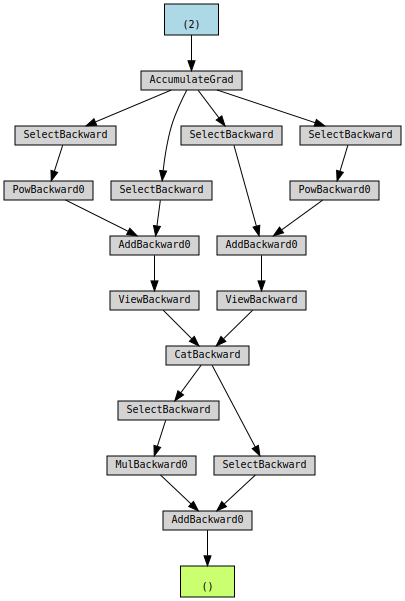

In [41]:
def f1(x):
    y1 = x[0] **2+x[1]
    y2 = x[0] +x[1]**2
    return torch.cat([y1.reshape(1),y2.reshape(1)])

def f2(x):
    return 2*x[0]+x[1]

x = torch.tensor([1,3], dtype=torch.float32, requires_grad=True)
print(f1(x))
print(f2(f1(x)))

z = f2(f1(x))
z.backward()
print(x.grad)

# draw a graph of computation of y
make_dot(z)

# Higher order derivative

$f(x,w) = (x+5w)^2$

$f_x(x,w) = \frac{\partial}{\partial x}(x+5w)^2 = 2(x+5w)$

$f_w(x,w) = \frac{\partial}{\partial w}(x+5w)^2 = 10(x+5w)$

$f_{xx} = \frac{\partial f_x}{\partial x} = 2$

$f_{xw} = \frac{\partial f_x}{\partial w} = 10$

$f_{wx} = \frac{\partial f_w}{\partial x} = 10$

$f_{ww} = \frac{\partial f_w}{\partial w} = 50$

In [10]:
# higher order derivative
x = torch.tensor(2.0, requires_grad=True)
w = torch.tensor(3.0, requires_grad=True)

def f1(x):
  return x**2

def f2(x, w):
  return x+5*w

y=f1(f2(x, w))

(fx, fw) = torch.autograd.grad(outputs=y, inputs=(x, w), create_graph=True)
print('fx =', fx)
print('fw =', fw)

fx.backward(retain_graph=True)
print('x.grad =', x.grad)
print('w.grad =', w.grad)

x.grad = None
w.grad = None
fw.backward()
print('x.grad =', x.grad)
print('w.grad =', w.grad)

fx = tensor(34., grad_fn=<MulBackward0>)
fw = tensor(170., grad_fn=<MulBackward0>)
x.grad = tensor(2.)
w.grad = tensor(10.)
x.grad = tensor(10.)
w.grad = tensor(50.)
